In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cust_df = pd.read_csv('Customer-Churn.csv')

In [4]:
cust_df.shape

(7043, 21)

In [4]:
cust_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges - Should be numeric but it's string.

In [7]:
cust_df['TotalCharges'] = pd.to_numeric(cust_df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [6]:
cust_df.loc[487:489]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
487  3649-JPUGY    Male              0      No         No      72   
488  4472-LVYGI  Female              0     Yes        Yes       0   
489  8372-JUXUI    Male              0      No        Yes       1   

    PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
487          Yes               Yes             DSL             No  ...   
488           No  No phone service             DSL            Yes  ...   
489          Yes               Yes     Fiber optic             No  ...   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
487              Yes         Yes         Yes             Yes        Two year   
488              Yes         Yes         Yes              No        Two year   
489               No          No          No              No  Month-to-month   

    PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
487              Yes  Bank transfer (automatic)          88.60       6201.95   
488              Yes  Bank transfer (automatic)          52.55                 
489              Yes           Electronic check          74.35         74.35   

    Churn  
487    No  
488    No  
489   Yes  

[3 rows x 21 columns]

Value of 'Total Charges' at Row 488 is empty and it's causing error in pd.to_numeric conversion. Hence, we use errors = coerce to fill with NaN.

In [4]:
cust_df['TotalCharges'] = pd.to_numeric(cust_df['TotalCharges'], errors='coerce')

In [13]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
cust_df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Null and Missing Values Check

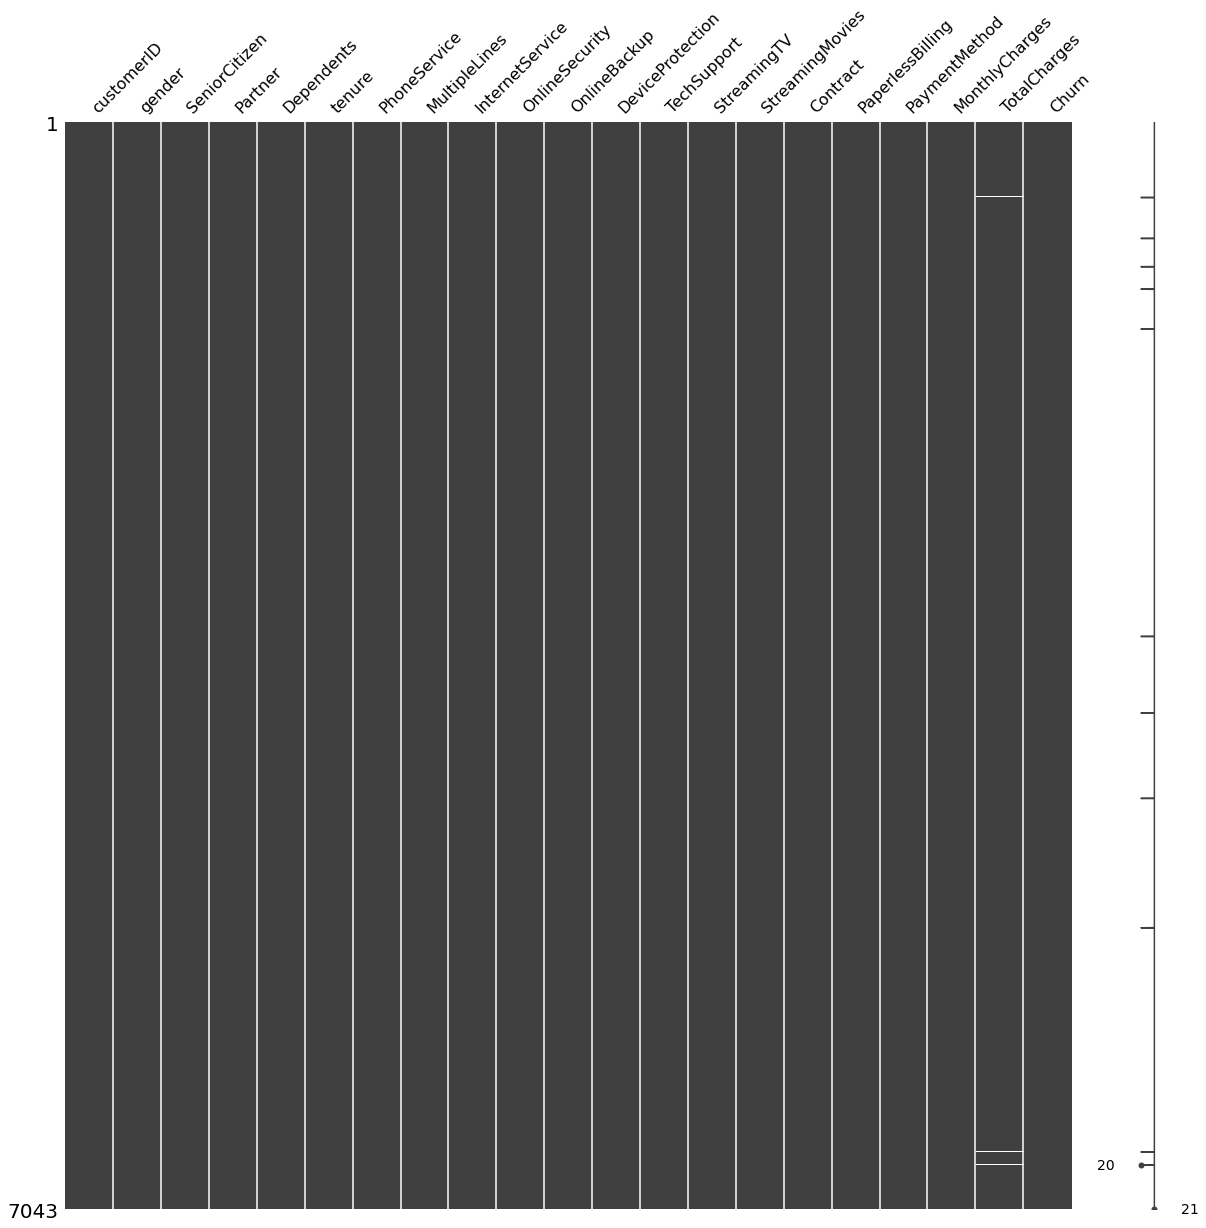

In [5]:
import missingno as msno
msno.matrix(cust_df, figsize= (20,20));

# <H1> EDA

## <H2> Univariate

### Categorical Features

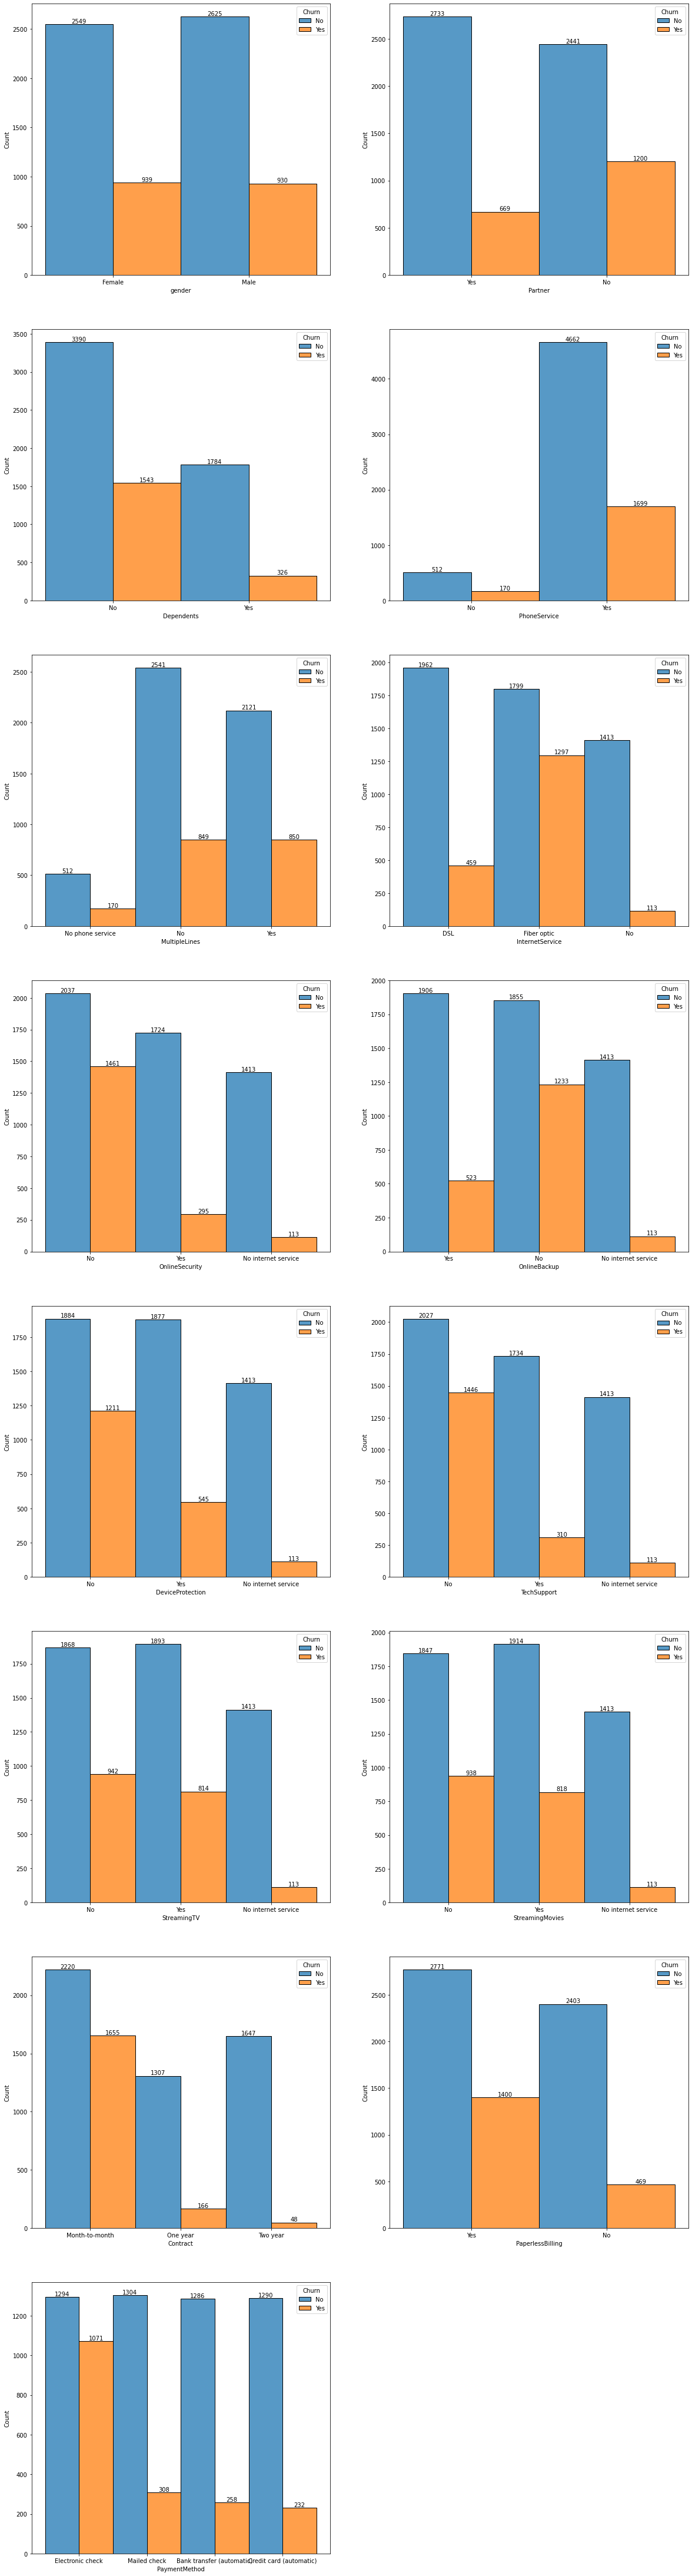

In [6]:
cols_to_plot_uni = cust_df.columns.drop(['customerID','tenure','MonthlyCharges','SeniorCitizen', 'TotalCharges', 'Churn'])
plt.figure(figsize = (20, 100))
for i in range(0,15):
    plt.subplot(10, 2, i+1)
    ax = sns.histplot(cust_df, x = cols_to_plot_uni[i], multiple='dodge', hue='Churn')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

[Text(0, 0, '682'), Text(0, 0, '6361')]

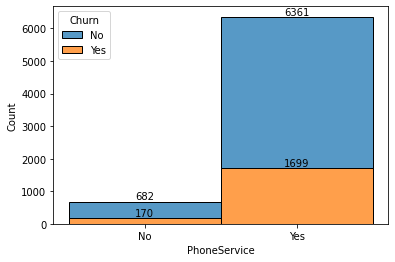

In [64]:
ax = sns.histplot(cust_df, x = 'PhoneService', multiple='stack', hue="Churn", stat = 'count')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [65]:
Phon_Serv_df = pd.DataFrame(pd.pivot_table(cust_df, values='customerID', index=['PhoneService'],columns=['Churn'], aggfunc="count", margins=True))
Phon_Serv_perc_df = pd.DataFrame(np.zeros((3,3)), index = Phon_Serv_df.index,  columns=Phon_Serv_df.columns)
for x in range(0,3):
    for y in range(0,3):
        Phon_Serv_perc_df.iloc[x,y] = Phon_Serv_df.iloc[x,y]/Phon_Serv_df.iloc[x,2]
Phon_Serv_perc_df

Churn               No       Yes  All
PhoneService                         
No            0.750733  0.249267  1.0
Yes           0.732904  0.267096  1.0
All           0.734630  0.265370  1.0

[Text(0, 0, '3390'), Text(0, 0, '1784')]

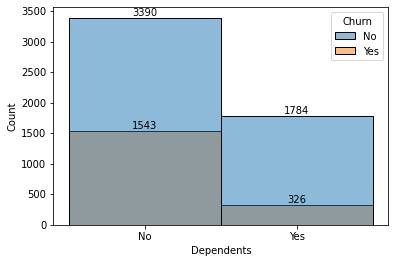

In [58]:
ax = sns.histplot(cust_df, x = 'Dependents', multiple='layer', hue="Churn", stat = "count") #stat = percent doesn't work, it switches the axis
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [12]:
Dependent_df = pd.DataFrame(pd.pivot_table(cust_df, values='customerID', index=['Dependents'],columns=['Churn'], aggfunc="count", margins=True))
Dependent_df

Churn         No   Yes   All
Dependents                  
No          3390  1543  4933
Yes         1784   326  2110
All         5174  1869  7043

In [40]:
Dependent_perc_df = pd.DataFrame(np.zeros((3,3)), index = Dependent_df.index,  columns=Dependent_df.columns)
for x in range(0,3):
    for y in range(0,3):
        Dependent_perc_df.iloc[x,y] = Dependent_df.iloc[x,y]/Dependent_df.iloc[x,2]
Dependent_perc_df

Churn             No       Yes  All
Dependents                         
No          0.687209  0.312791  1.0
Yes         0.845498  0.154502  1.0
All         0.734630  0.265370  1.0

In [8]:
#sns.countplot(cust_df, x="gender")
#thrws boolean error

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [76]:
#sns.set(style="white")

### Numerical Features

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Count'>

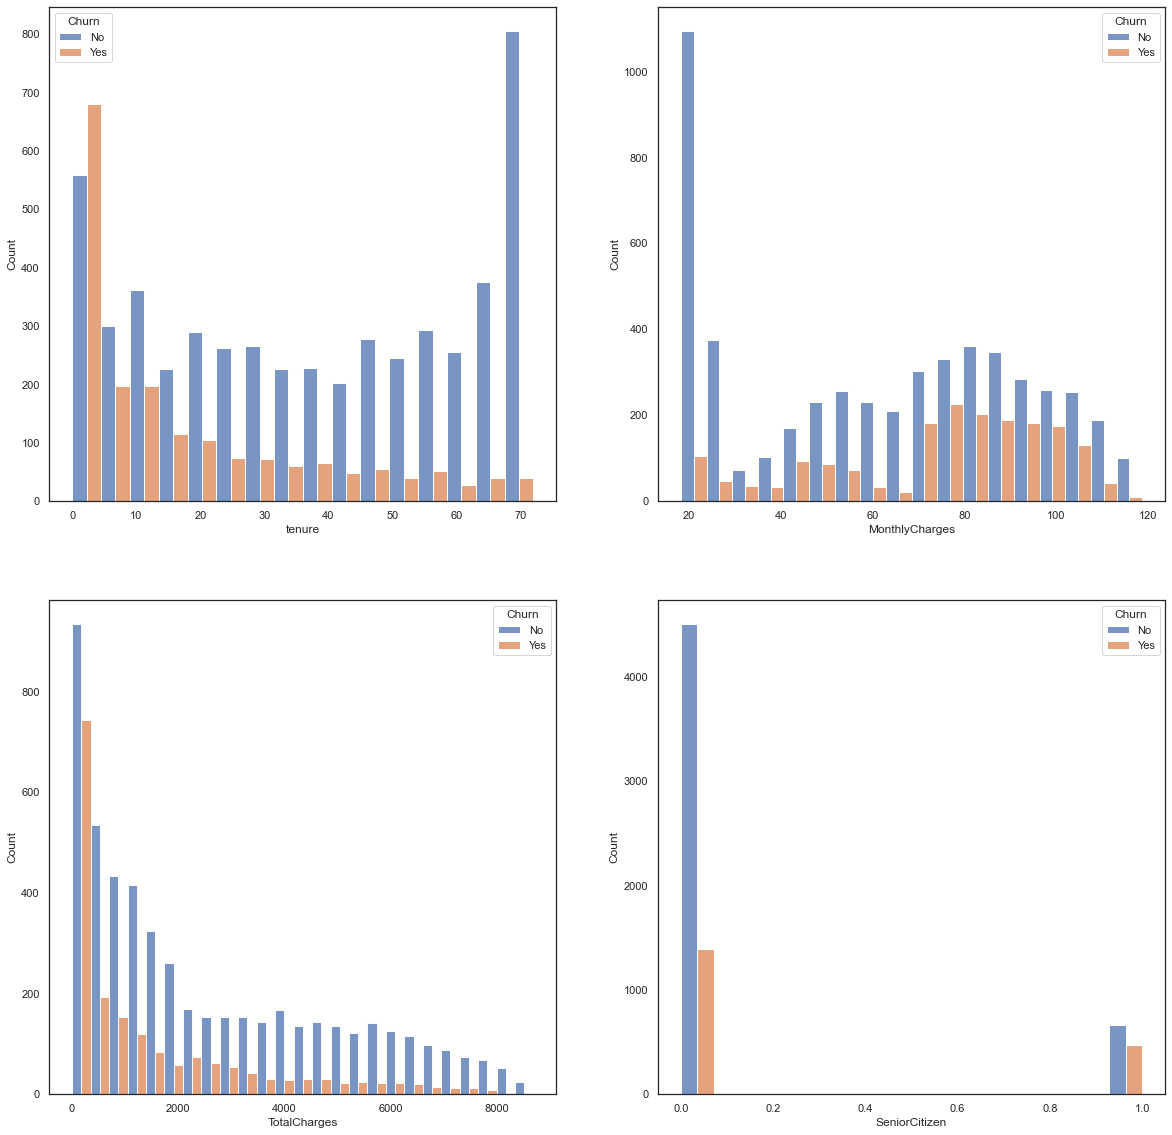

In [77]:
plt.figure(figsize = (20, 20))
plt.subplot(2,2,1)
sns.histplot(cust_df, x = 'tenure', multiple='dodge', hue="Churn")

plt.subplot(2,2,2)
sns.histplot(cust_df, x = 'MonthlyCharges', multiple='dodge', hue="Churn")

plt.subplot(2,2,3)
sns.histplot(cust_df, x = 'TotalCharges', multiple='dodge', hue="Churn")

plt.subplot(2,2,4)
sns.histplot(cust_df, x = 'SeniorCitizen', multiple='dodge', hue="Churn")

Customer staying for longer tenure are less likey to Churn. 
First 5 years, nearly 50% chance of churning

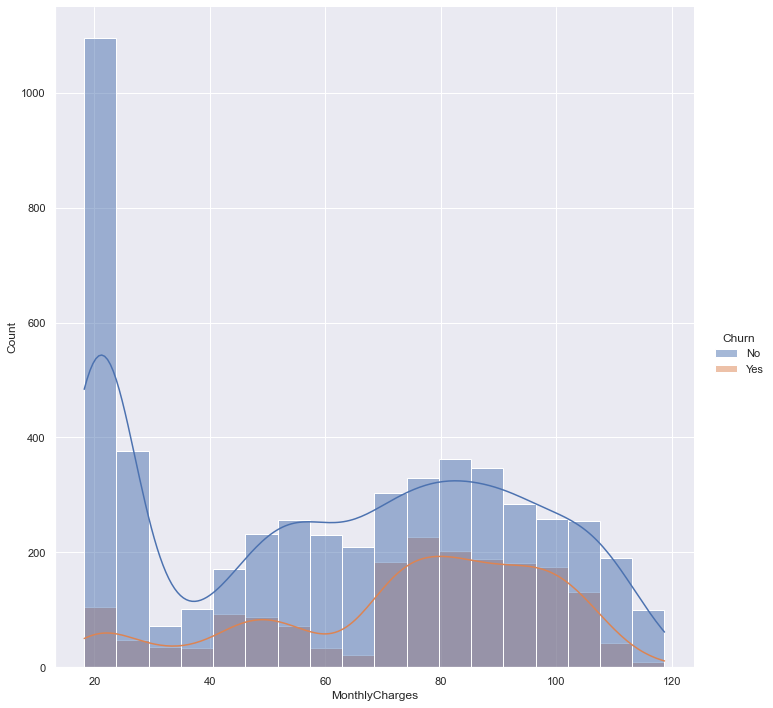

In [81]:
with sns.axes_style("darkgrid"):
    g = sns.displot(cust_df, x = 'MonthlyCharges', kde=True, hue='Churn', height=10)
#g.set_xticklabels([list(range(20,120,10))])

Customers are more likely to churn when Monthly Charges are higher than 70.

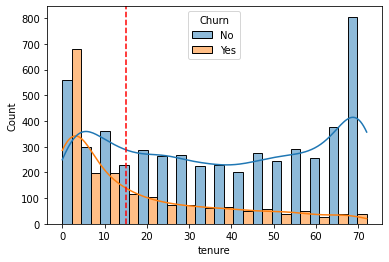

In [13]:
ax = sns.histplot(cust_df, x = 'tenure', multiple='dodge', hue="Churn", kde = True)
ax.axvline(x = 15, ymin = 0, ymax = 1, linestyle = "--", color = 'r') 

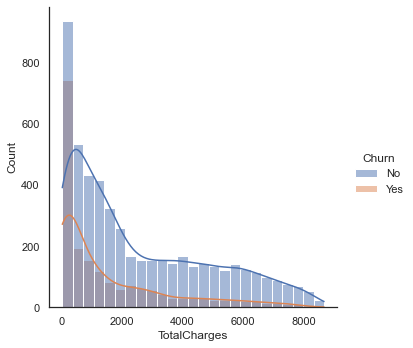

In [79]:
sns.displot(cust_df, x = 'TotalCharges', kde=True, hue='Churn')

[Text(0, 0, '4508'), Text(0, 0, '666')]

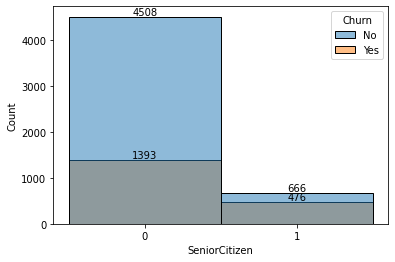

In [32]:
ax =sns.histplot(cust_df, x = 'SeniorCitizen', discrete = True, hue="Churn")#stat = percent doesn't work, it switches the axis
ax.xaxis.set_ticks(ticks = [0,1], labels= [0,1])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

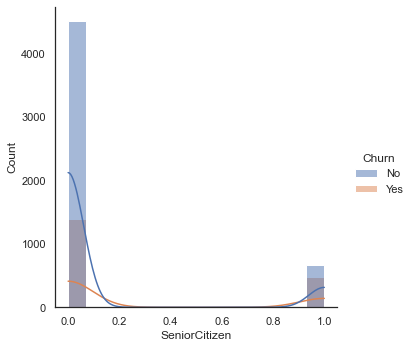

In [82]:
sns.displot(cust_df, x = 'SeniorCitizen', kde=True, hue='Churn')

In [104]:
cust_df[cust_df["SeniorCitizen"]==1]["Churn"].value_counts()/cust_df[cust_df["SeniorCitizen"]==1]["Churn"].value_counts().sum()

No     0.583187
Yes    0.416813
Name: Churn, dtype: float64

In [37]:
cust_df[cust_df["SeniorCitizen"]==0]["Churn"].value_counts()/cust_df[cust_df["SeniorCitizen"]==0]["Churn"].value_counts().sum()

No     0.763938
Yes    0.236062
Name: Churn, dtype: float64

Probability of Churning:
* Senior Citizen - 41% 
* Non-Senior Citizen - 23% 

In [98]:
print(pd.pivot_table(cust_df, values='customerID', index=['SeniorCitizen'],columns=['Churn'], aggfunc="count"))

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


## <H2> Bivariate

### Categorical features

In [5]:
cust_df_Churn = cust_df[cust_df["Churn"]=="Yes"]
cust_df_Ret = cust_df[cust_df["Churn"]=="No"]
cols_to_plot_bi = cust_df.columns.drop(['customerID','tenure','MonthlyCharges','SeniorCitizen', 'TotalCharges','Churn'])

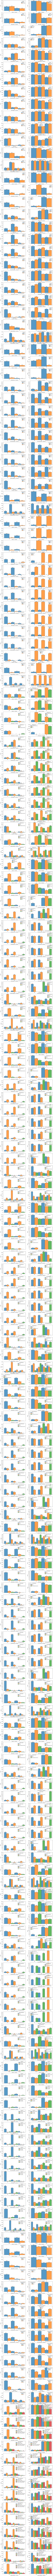

In [13]:
plt.figure(figsize=(15, 800))
for j in range(0,len(cols_to_plot_bi)):
    col_hue = cols_to_plot_bi[j]
    col_plot = cols_to_plot_bi.drop(cols_to_plot_bi[j])
    for i in range(0,len(col_plot)):
        plt.subplot(210, 2, ((2*i)+(14*2*j)+1))
        ax1 = sns.histplot(cust_df_Churn, x = col_plot[i], multiple='dodge', hue= col_hue)
        ax1.set_xlabel(col_plot[i] + " - Churned")

        plt.subplot(210, 2, ((2*i)+(14*2*j)+2), sharey = ax1)
        ax2 = sns.histplot(cust_df_Ret, x = col_plot[i], multiple='dodge', hue= col_hue)
        ax2.set_xlabel(col_plot[i] + " - Retained")

        x = cust_df_Churn[col_hue].nunique()
        for i in range(0,x):
            ax2.bar_label(ax2.containers[i])
            ax1.bar_label(ax1.containers[i])
        #print(col_hue,col_plot[i])

### Numerical Features

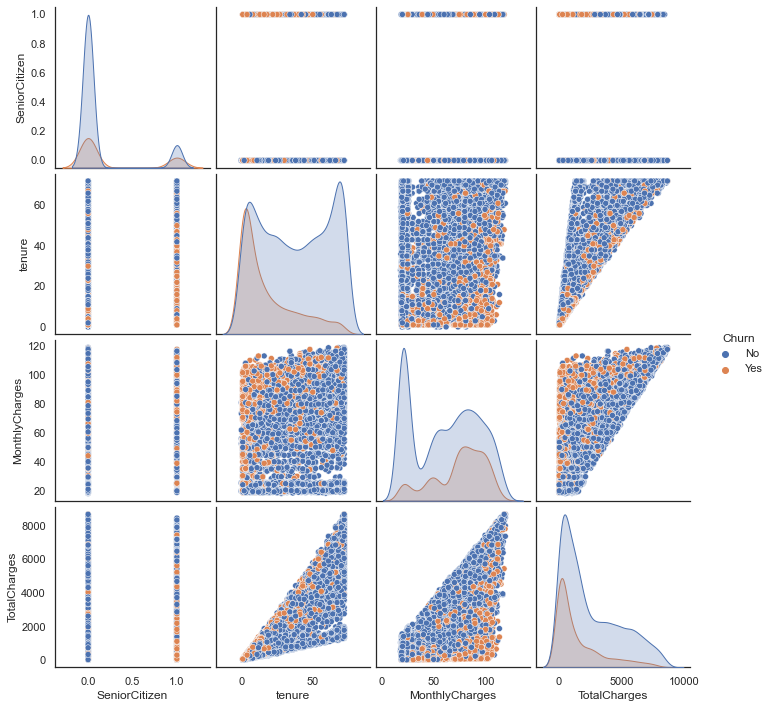

In [119]:
sns.pairplot(cust_df, hue="Churn")

#### Tenure Vs MonthlyCharges

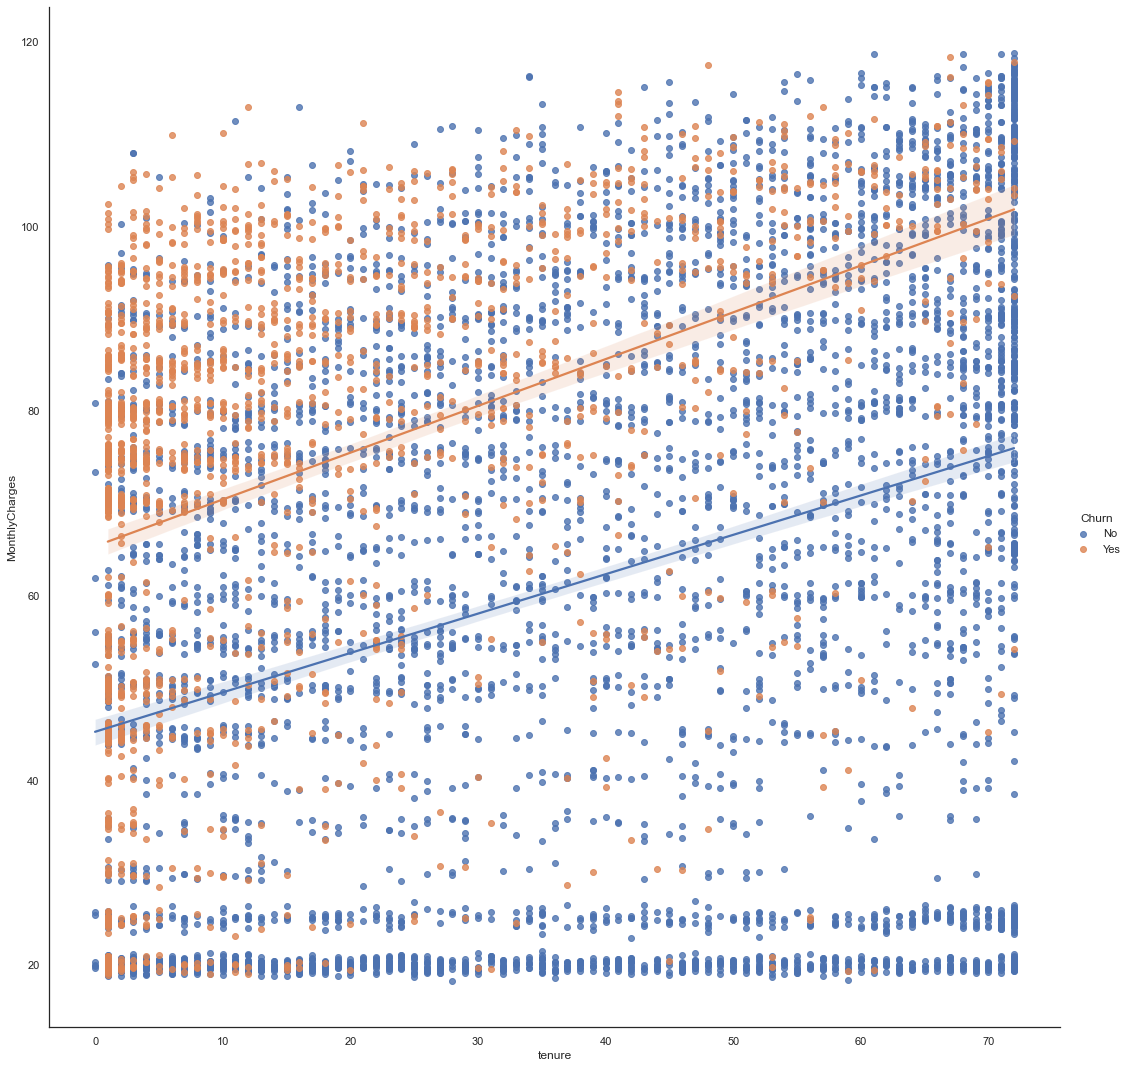

In [134]:
sns.lmplot(data=cust_df, x="tenure", y="MonthlyCharges", hue="Churn", height = 15)

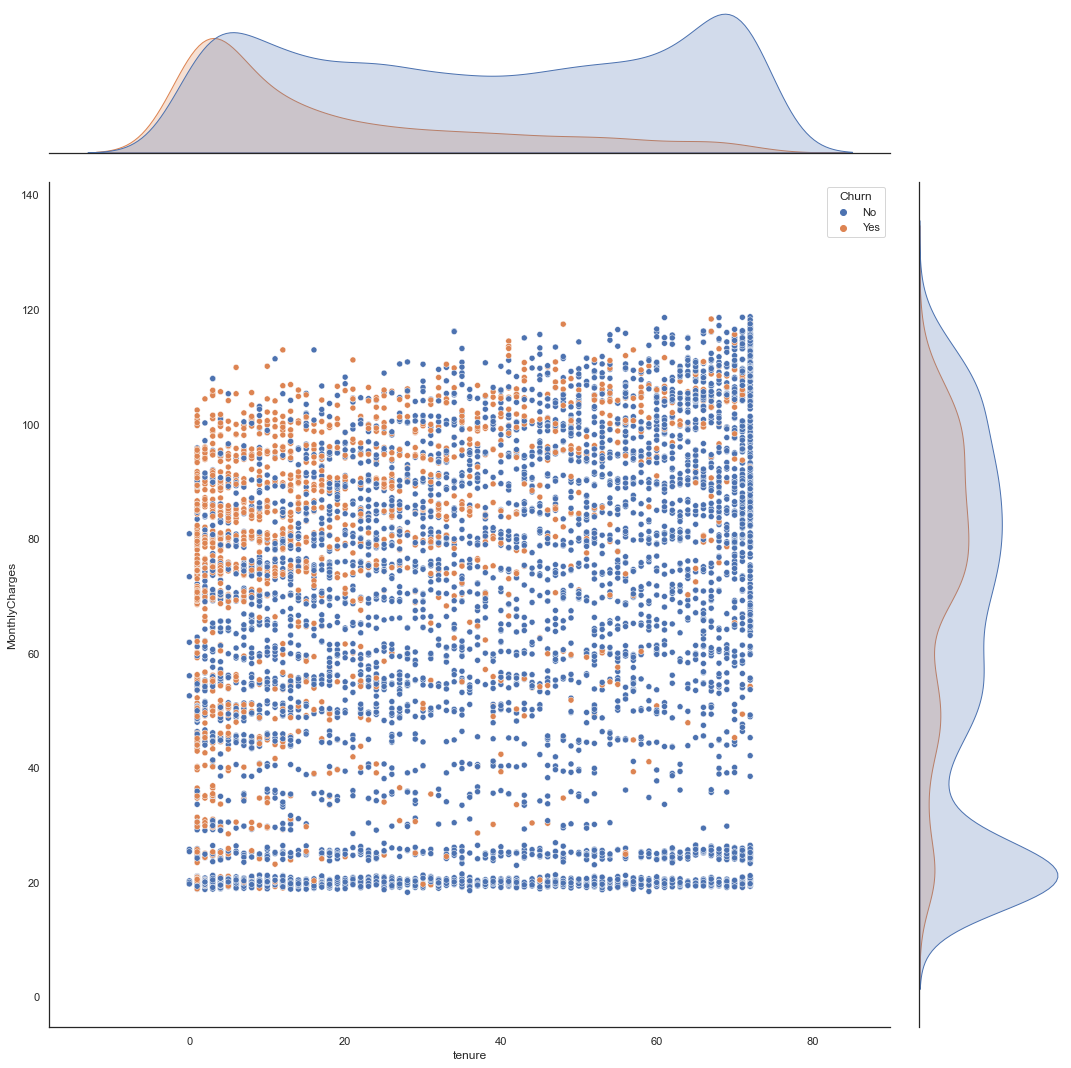

In [127]:
sns.jointplot(data=cust_df, x="tenure", y="MonthlyCharges", hue="Churn", height = 15)

#### Tenure Vs TotalCharges

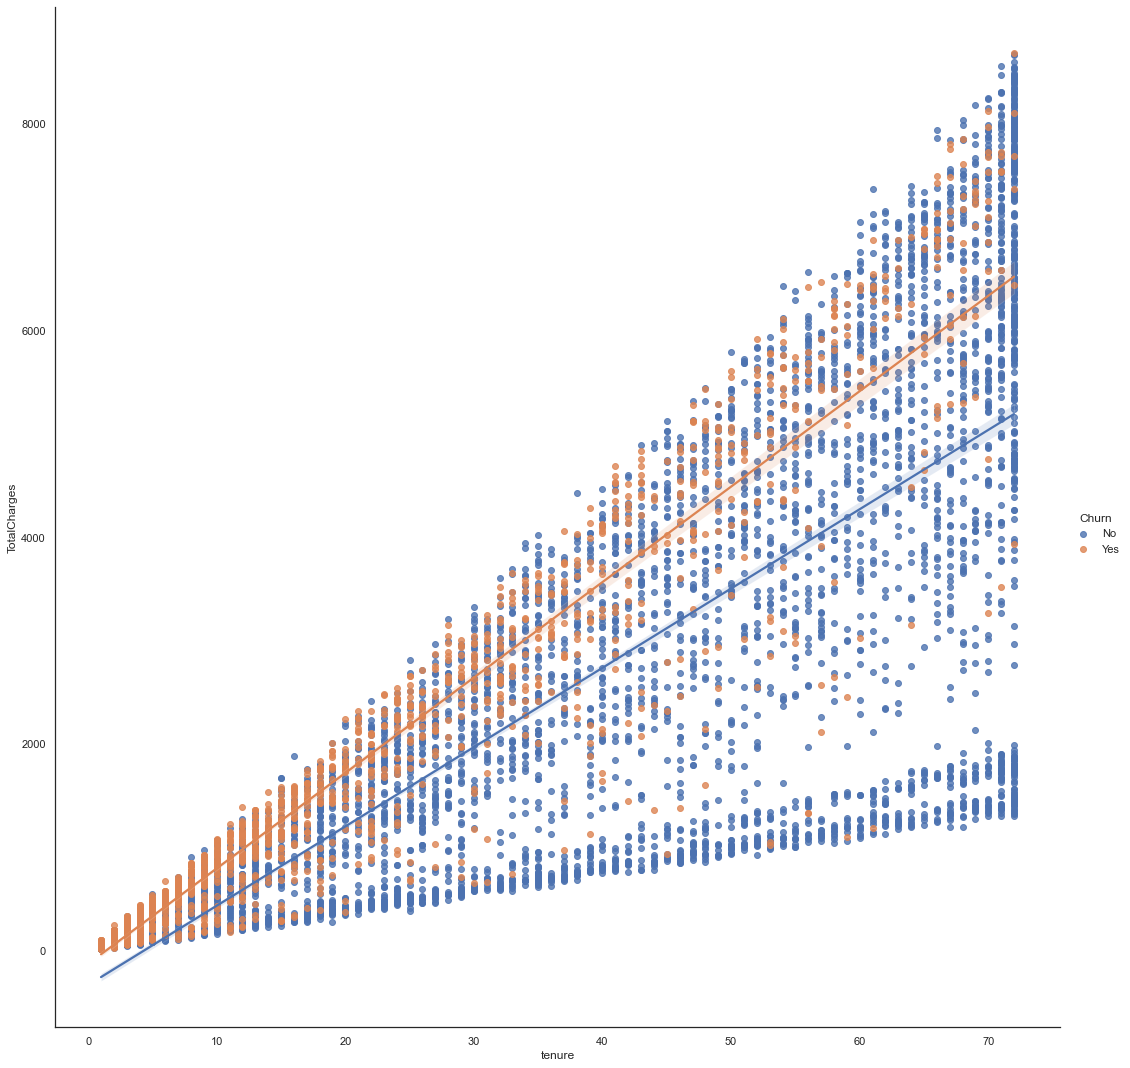

In [135]:
sns.lmplot(data=cust_df, x="tenure", y="TotalCharges", hue="Churn", height = 15)

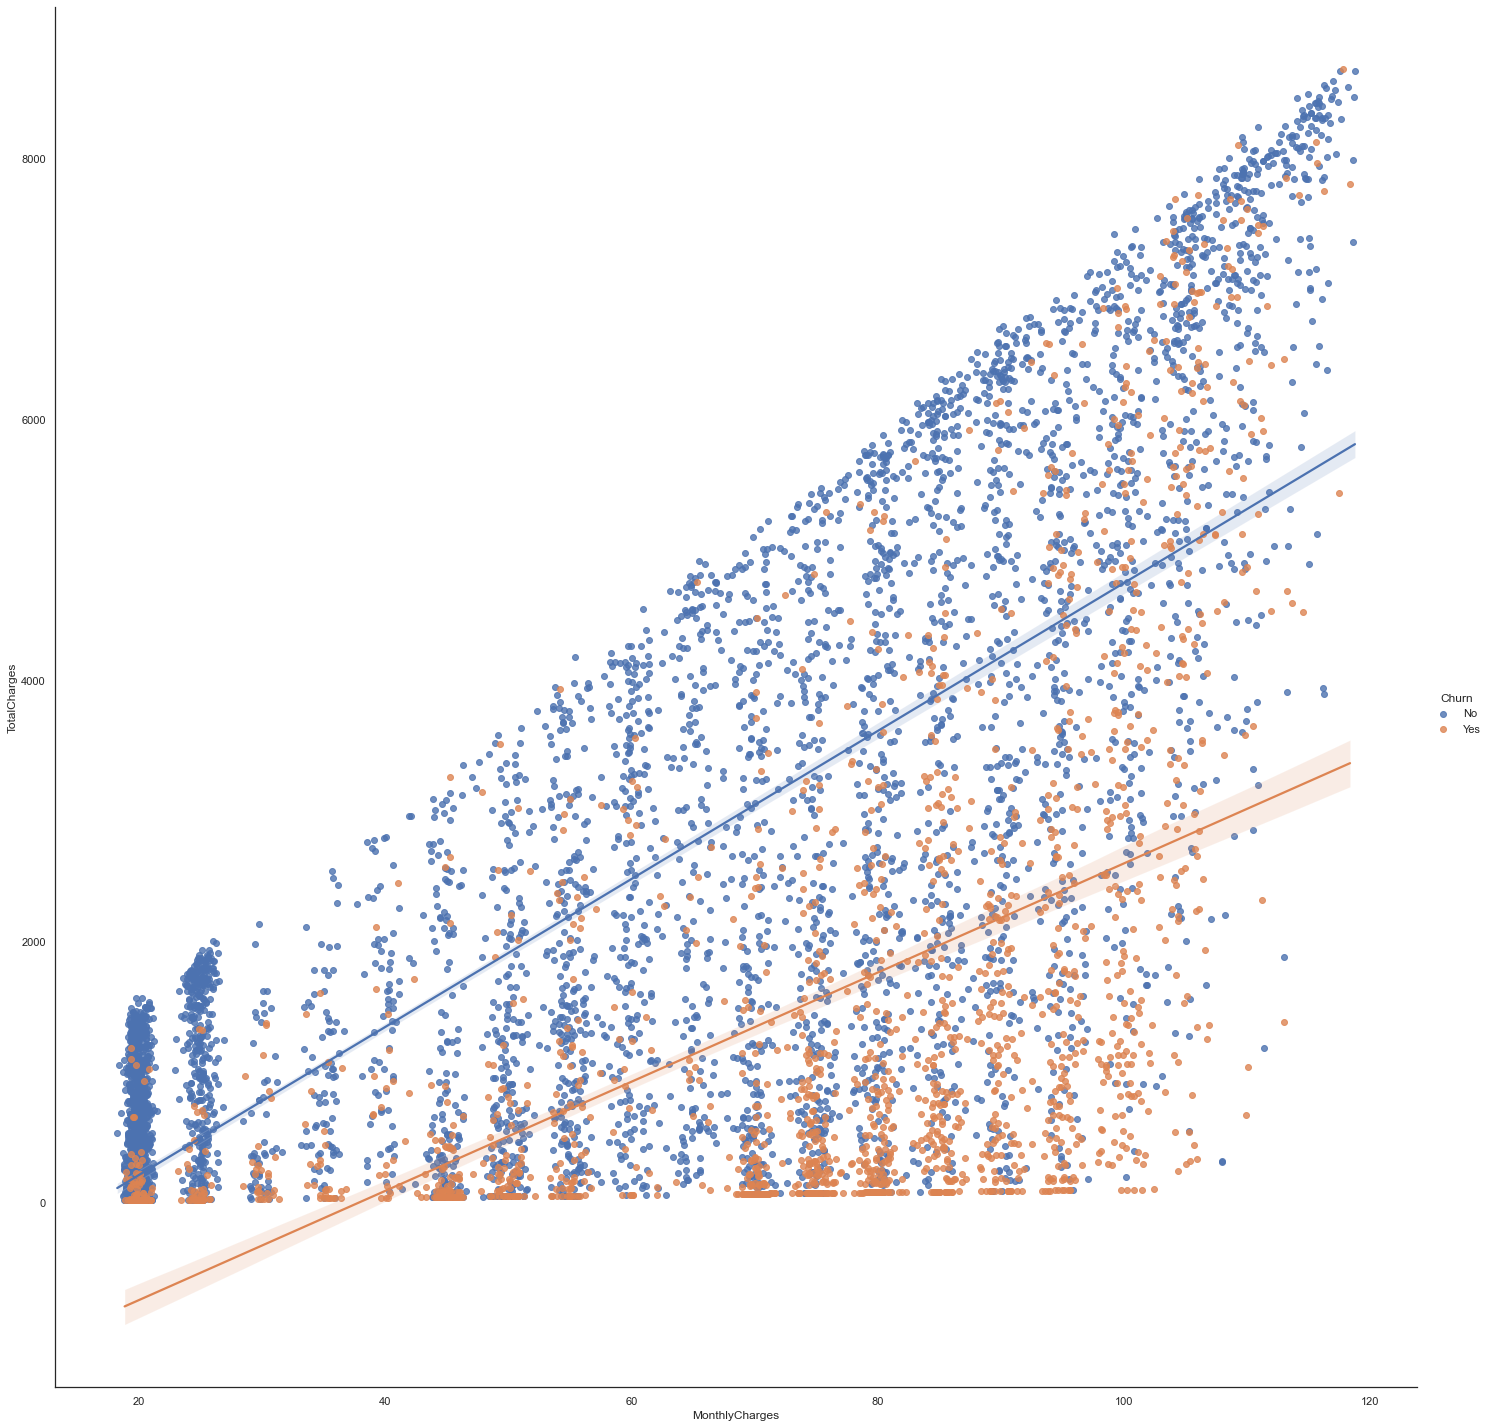

In [142]:
sns.lmplot(data=cust_df, x="MonthlyCharges", y="TotalCharges", hue="Churn", height = 20)

# Testing

In [ ]:
plt.figure(figsize=(15,75))
for j in range(len(cols_to_plot_bi)):
    col_hue = cols_to_plot_bi[j]
    col_plot = cols_to_plot_bi.drop(cols_to_plot_bi[j])
    for i in range(len(col_plot)):
        print((2*i)+(14*j)+1)
        print((2*i)+(14*j)+2)
        #print(col_hue,col_plot[i])

In [ ]:
plt.figure(figsize=(15, 800))
for j in range(0,len(cols_to_plot_bi)):
    col_hue = cols_to_plot_bi[j]
    col_plot = cols_to_plot_bi.drop(cols_to_plot_bi[j])
    for i in range(0,len(col_plot)):
        print(((2*i)+(14*2*j)+1),col_hue,col_plot[i])
        print(((2*i)+(14*2*j)+2),col_hue,col_plot[i])